In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [180]:
""" Your code here: 讀取 titanic.csv """
data=pd.read_csv("titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [181]:
"丟掉不重要欄位"
goal=data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)


In [182]:
'''將資料分成離散與連續'''
continual=[f for f in goal.columns if goal[f].dtypes!='object']
discreate=[f for f in goal.columns if goal[f].dtypes=='object']

#continual.remove('Survived') #為最終值
y=goal['Survived']

'''填補連續資料缺失值'''
missing = goal[continual].isnull().sum(axis = 0)
print(missing)#只有age有缺失值
goal['Age'].fillna(value=goal['Age'].median(), inplace=True)

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64


In [183]:
for i, feature in enumerate(continual):
    print(i,feature)
missing = goal[continual].isnull().sum(axis = 0)
print(missing)


0 Survived
1 Pclass
2 Age
3 SibSp
4 Parch
5 Fare
Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64


Sex 0
Embarked 2


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

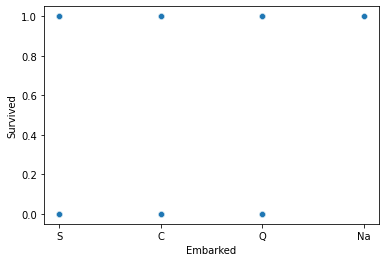

In [184]:
for i in discreate:
    print(i,goal[i].isnull().sum()) #發現只有Embarked 有缺失值
goal['Embarked'].fillna(value='Na', inplace=True)#發現na 值為存活因此新創離散值
sns.scatterplot(data=goal,x='Embarked',y='Survived')

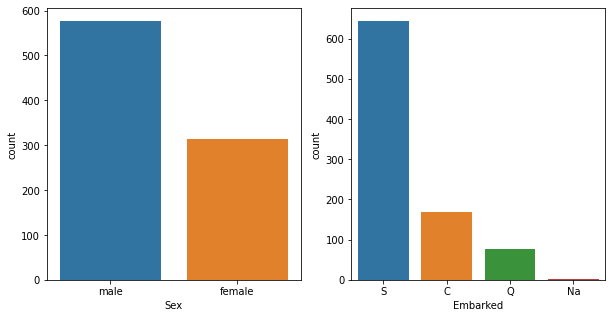

In [185]:
'''離散資料柱狀圖'''
fig = plt.figure(figsize = (10, 5))
for i, feature in enumerate(discreate):
    plt.subplot(1, 2, i+1)    
    sns.countplot(data=goal,x=feature)



In [186]:
discreate
print(goal['Sex'].isnull().sum())

0


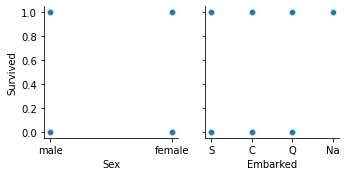

In [187]:
g = sns.PairGrid(goal,x_vars=discreate,y_vars='Survived')
g.map(sns.scatterplot)

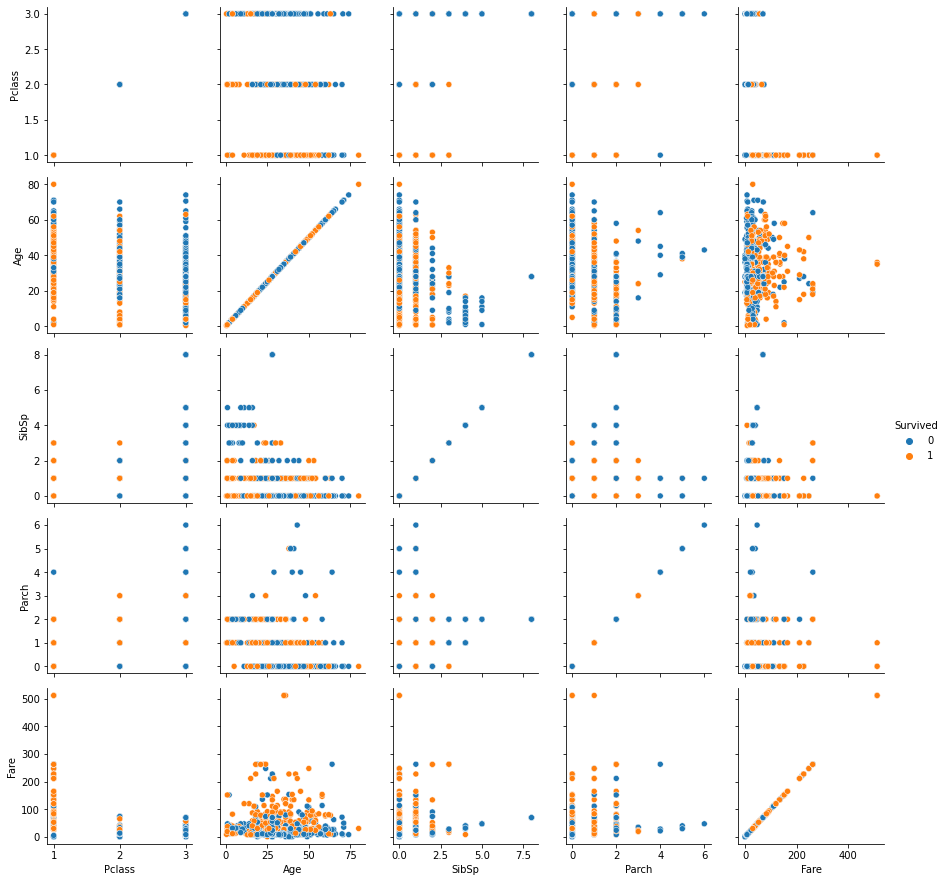

In [188]:
g = sns.PairGrid(goal[continual],hue="Survived")
g.map(sns.scatterplot)
g.add_legend()

In [189]:
'''離散處理 字串轉數字 label encoding and one hot encoding'''
labelencoder = LabelEncoder()
map_dict = {'female': 0, 'male': 1}

goal['Sex'] = goal['Sex'].map(map_dict)#label encoding
#goal['Sex'] = labelencoder.fit_transform(goal['Sex'])
goal=pd.get_dummies(goal,prefix='Embarked',columns=['Embarked'])
goal

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Na,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,0,1
5,0,3,1,28.0,0,0,8.4583,0,0,1,0
6,0,1,1,54.0,0,0,51.8625,0,0,0,1
7,0,3,1,2.0,3,1,21.0750,0,0,0,1
8,1,3,0,27.0,0,2,11.1333,0,0,0,1
9,1,2,0,14.0,1,0,30.0708,1,0,0,0


In [193]:
'''切分訓練集及測試集'''
split_idx = int(len(goal)*0.7) #train 0.7 test 0.3
target = 'Survived'
Train = goal[: split_idx]
Test = goal[split_idx: ]

y_train = np.asarray(Train[target], dtype = np.float64)
x_train = np.asarray(Train.drop(columns = [target]))

y_test = np.asarray(Test[target], dtype = np.float64)
x_test = np.asarray(Test.drop(columns = [target]))

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(623, 10) (623,) (268, 10) (268,)


In [194]:
'''Training'''
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [196]:
'''Evaluation'''
print('Training report')
pred = RF.predict(x_train)
print(classification_report(y_train, pred))

print()
print('Testing report')
pred = RF.predict(x_test)
print(classification_report(y_test, pred))

Training report
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       377
         1.0       0.97      0.92      0.95       246

    accuracy                           0.96       623
   macro avg       0.96      0.95      0.96       623
weighted avg       0.96      0.96      0.96       623


Testing report
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       172
         1.0       0.80      0.69      0.74        96

    accuracy                           0.82       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268

